<a href="https://colab.research.google.com/github/elleniayele/Prediction-of-Product-Sales1/blob/main/prediction%20of%20sales%20in%20pipelines%20and%20transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
set_config(display='diagram')

In [117]:
import pandas as pd
filename ='/sales_predictions_2023 (1).csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [118]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

In [119]:
df.shape

(8523, 12)

In [120]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [121]:
for col in df:
 print(col)
 print(df[col].unique())
 print('\n\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']



Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7

we have to fix inconsistencies with item_fat_content column

In [122]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.lower()

In [123]:
df=df.replace(['lf','reg'],['low fat','regular'])
df['Item_Fat_Content'].unique()

array(['low fat', 'regular'], dtype=object)

now lets convert the ordinal type to ordered numeric type

In [124]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Text(0.5, 1.0, 'Item outlet sales by item type')

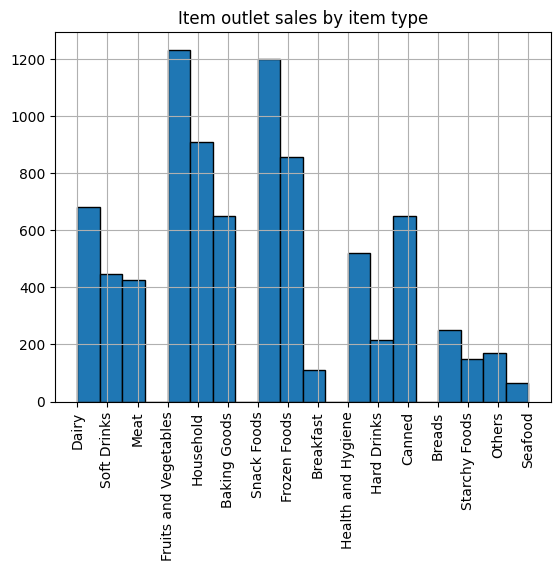

In [125]:
ax = df['Item_Type'].hist(bins = 20,edgecolor='black')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Item outlet sales by item type")

Text(0.5, 1.0, 'Item outlet sales by item type')

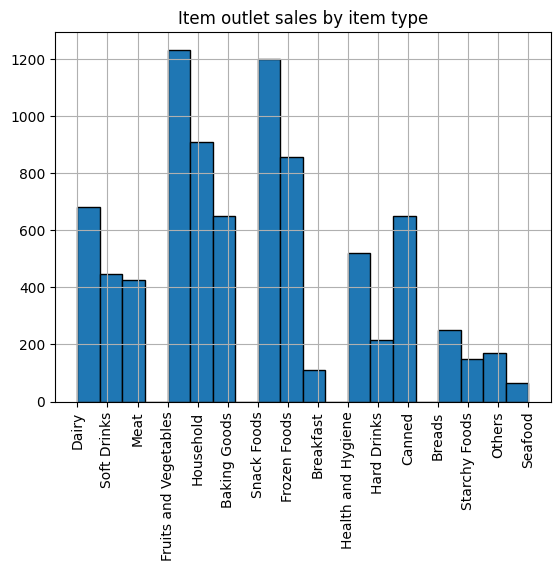

In [126]:
ax = df['Item_Type'].hist(bins = 20,edgecolor='black')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Item outlet sales by item type")

Text(0.5, 1.0, 'Item outlet sales by item fat content')

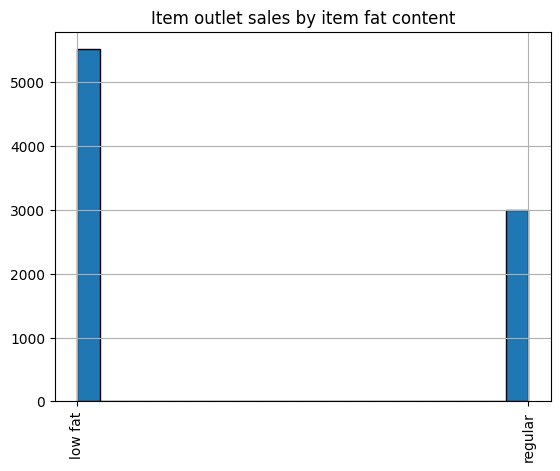

In [127]:
ax = df['Item_Fat_Content'].hist(bins = 20,edgecolor='black')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Item outlet sales by item fat content")

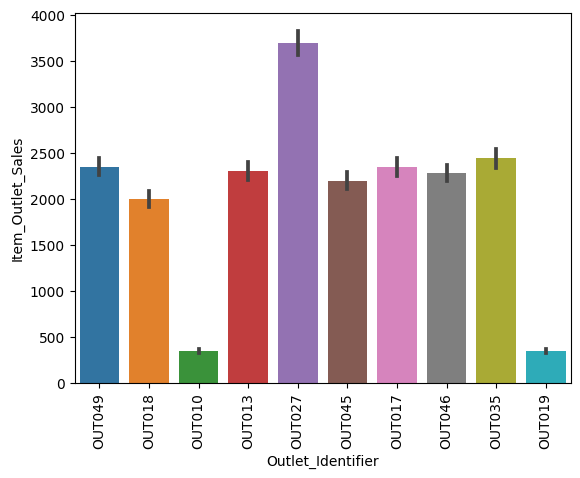

In [128]:
df['Outlet_Identifier']
ax =  sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

Text(0.5, 1.0, 'Item outlet sales by outlet ')

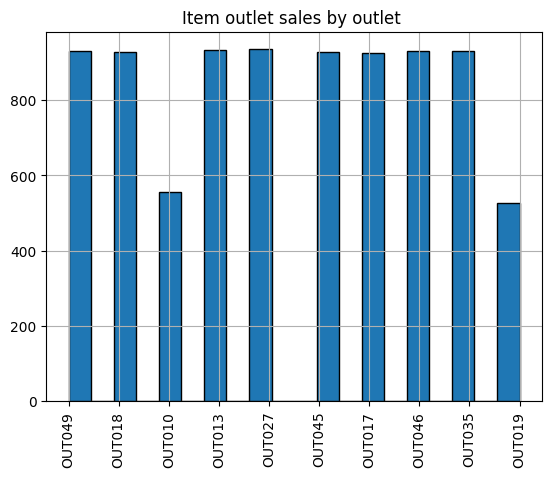

In [129]:
ax = df['Outlet_Identifier'].hist(bins = 20,edgecolor='black')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Item outlet sales by outlet ")

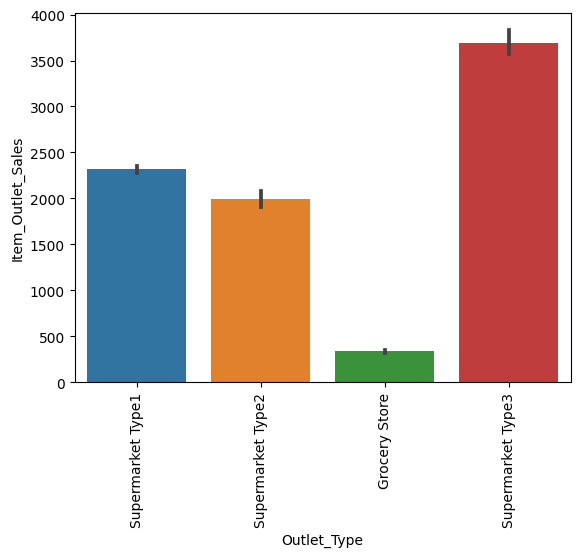

In [130]:
df['Outlet_Type']
ax =  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

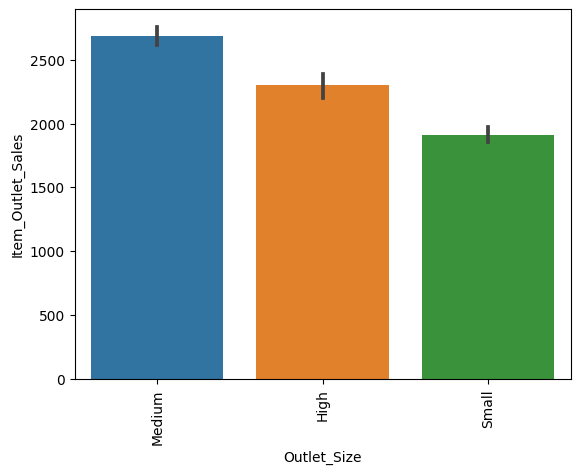

In [131]:
df['Outlet_Size']
ax =  sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

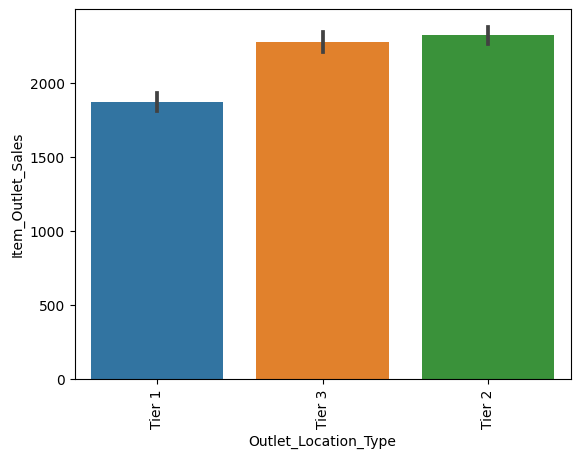

In [132]:
ax =  sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

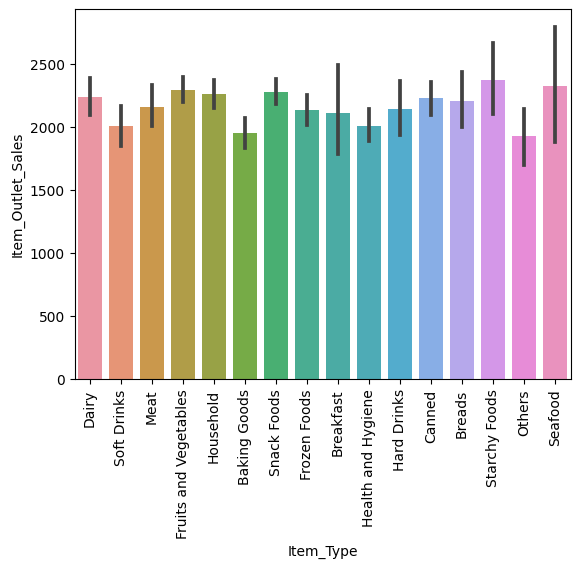

In [133]:
ax = sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis = 'x', rotation = 90);

In [134]:
df.drop(columns='Item_Identifier')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,low fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,low fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [135]:
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [136]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [137]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
reg = LinearRegression()

In [138]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [139]:
#catagorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [140]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple,remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3cbfdc460>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3cbfdefb0>)])

In [141]:
#Function for metrics
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')#

In [142]:
preprocessor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3cbfdc460>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3cbfdefb0>)])

In [143]:
#transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [144]:
X_train_processed

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

build a linear regression model

In [145]:
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3cbfdc460>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3cbfdefb0>)])),
                ('linearregression', LinearRegression())])

 Make predictions using the testing data.

In [146]:
training_predictions = linreg_pipe.predict(X_train)
test_predictions = linreg_pipe.predict(X_test)
eval_regression(y_train,training_predictions)
eval_regression(y_test,test_predictions)

model Scores
MAE: 736.8412 
MSE: 973,567.8647 
RMSE: 986.6954 
R2: 0.6710

model Scores
MAE: 1,187,543,221,789.1191 
MSE: 346,975,614,466,492,779,171,151,872.0000 
RMSE: 18,627,281,456,683.1719 
R2: -125762403336902131712.0000



In [147]:
# Make predictions using the training and testing data
training_predictions = linreg_pipe.predict(X_train)
test_predictions = linreg_pipe.predict(X_test)
training_predictions[:10]

array([2984., 3756., 2220., 1220., 2192., -128., 1632., 4380., 3676.,
       1608.])

Evaluate the performance of your model based on r^2.

In [148]:
#calculating R2
train_r2 = r2_score(y_train, training_predictions)
test_r2= r2_score(y_test, test_predictions)
print(f'model training r2:{train_r2}')
print (f'model testing r2:{test_r2}')

model training r2:0.6710314456901736
model testing r2:-1.2576240333690213e+20


This score can be interpreted as saying that our model can account for about 22% of the variation in y_test using the features in X_test.

In [150]:
training_predictions = linreg_pipe.predict(X_train)
test_predictions = linreg_pipe.predict(X_test)
eval_regression(y_train,training_predictions)
eval_regression(y_test,test_predictions)

model Scores
MAE: 736.8412 
MSE: 973,567.8647 
RMSE: 986.6954 
R2: 0.6710

model Scores
MAE: 1,187,543,221,789.1191 
MSE: 346,975,614,466,492,779,171,151,872.0000 
RMSE: 18,627,281,456,683.1719 
R2: -125762403336902131712.0000



In [151]:
training_predictions = linreg_pipe.predict(X_train)
test_predictions = linreg_pipe.predict(X_test)
eval_regression(y_train,training_predictions)
eval_regression(y_test,test_predictions)

model Scores
MAE: 736.8412 
MSE: 973,567.8647 
RMSE: 986.6954 
R2: 0.6710

model Scores
MAE: 1,187,543,221,789.1191 
MSE: 346,975,614,466,492,779,171,151,872.0000 
RMSE: 18,627,281,456,683.1719 
R2: -125762403336902131712.0000



Evaluate the performance of your model based on rmse.

In [153]:
train_MSE= mean_squared_error(y_train,training_predictions)
test_MSE= mean_squared_error(y_test,  test_predictions)
print(f"model training r2:{train_MSE}")
print(f"model testing r2:{test_MSE}")

model training r2:973567.8646620708
model testing r2:3.469756144664928e+26


In [154]:
train_RMSE=np.sqrt(train_MSE)
test_RMSE=np.sqrt(test_MSE) 
print(f"model training r2:{train_RMSE}")
print(f"model testing r2:{test_RMSE}")

model training r2:986.6954264929329
model testing r2:18627281456683.17


Regression tree model to predict sales.

In [155]:
from sklearn.tree import DecisionTreeRegressor

Fitting a Decision Tree Regressor Model

In [157]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [158]:
Dec_tree_reg_pipe = make_pipeline(preprocessor,dec_tree)
Dec_tree_reg_pipe .fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3cbfdc460>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3cbfdefb0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
# Make predictions using the training and testing data
training_predictions = Dec_tree_reg_pipe .predict(X_train)
test_predictions = Dec_tree_reg_pipe .predict(X_test)
training_predictions[:10]

Compare the performance of your model based on r^2.

In [159]:
#calculating R2
train_r2 = r2_score(y_train, training_predictions)
test_r2= r2_score(y_test, test_predictions)
print(f'model training r2:{train_r2}')
print (f'model testing r2:{test_r2}')

model training r2:0.6710314456901736
model testing r2:-1.2576240333690213e+20


Compare the performance of your model based on rmse.

In [160]:
train_MSE= mean_squared_error(y_train,training_predictions)
test_MSE= mean_squared_error(y_test, test_predictions)
print(f"model training r2:{train_MSE}")
print(f"model testing r2:{test_MSE}")

model training r2:973567.8646620708
model testing r2:3.469756144664928e+26


In [161]:
train_RMSE=np.sqrt(train_MSE)
test_RMSE=np.sqrt(test_MSE) 
print(f"model training r2:{train_RMSE}")
print(f"model testing r2:{test_RMSE}")

model training r2:986.6954264929329
model testing r2:18627281456683.17
